## ライブラリのインポート 

In [1]:
import requests
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## APIサーバのURLと認証キーを設定

In [2]:
# URL for the web service
scoring_uri = 'http://cc50dc69-913b-4cb6-8329-e91f7ffb7d80.eastus.azurecontainer.io/score'
# If the service is authenticated, set the key or token
key = 'Xh6OioxIVylx8mCLaBPPIjDRawOy9UNl'

## Band Gap物性予測用のcsvファイルを取得する関数

In [3]:
def csv_to_list(csv_path):
    df = pd.read_csv(csv_path)
    features_list = df.iloc[:,1:].values.tolist()
    target_list = df.iloc[:,0].values.tolist()
    
    return target_list, features_list

## APIサーバに特徴量のリストを送信し、予測値のリストを返す関数

In [4]:
def get_predict(features_list, uri, key):
    features_dict = {"data": features_list}
    input_data = json.dumps(features_dict)
    headers = {'Content-Type': 'application/json'}
    headers['Authorization'] = f'Bearer {key}' 
    resp = requests.post(uri, input_data, headers=headers)
    result = resp.text
    predict_dict=json.loads(json.loads(result))
    return predict_dict["result"]

## テストデータの読み込み、テストデータについての予測

In [5]:
test_target, test_features = csv_to_list('BG_test.csv')
test_predict = get_predict(test_features, scoring_uri, key)

## 訓練データの読み込み、訓練データについての予測

In [6]:
train_target, train_features = csv_to_list('BG_train.csv')
train_predict = get_predict(train_features, scoring_uri, key)

## 結果のプロット

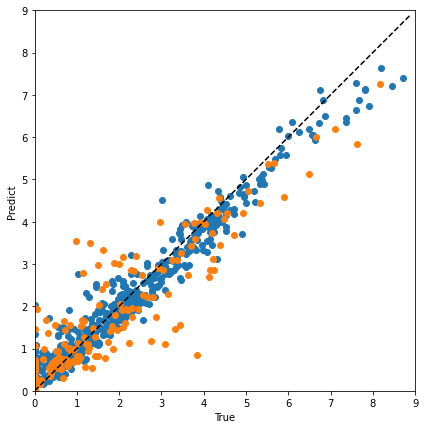

In [9]:
fig = plt.figure(figsize=(7,7))
ax = fig.add_subplot(1, 1, 1)
ax.scatter(train_target, train_predict, label='Train set')
ax.scatter(test_target, test_predict, label='Test set')
ax.set_aspect('equal') 
x = np.arange(0, 9, 0.1)
y = x
plt.plot(x, y, c="black", linestyle="dashed")
plt.xlim(0,9)
plt.ylim(0,9)
plt.xlabel("True")
plt.ylabel("Predict")
plt.show()